In [28]:
import pandas as pd
import tqdm
import networkx as nx
import datetime as dt
import matplotlib.pyplot as plt   
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
import numpy as np
from bokeh.plotting import figure, output_notebook, show #builds interactive graphs for python
from bokeh.models import Range1d
import math #this is used in graphic section to use the irrational number pi
output_notebook() #Allows inline plotting for Juptyer notebook

from bokeh.tile_providers import get_provider, Vendors
from pyproj import Transformer
tile_provider = get_provider('STAMEN_TERRAIN')
import simplekml as skml
import itertools

Loading BokehJS ...

In [2]:
data = pd.read_feather(os.getcwd() + '/metadata.feather', columns=['filename','medianame','datetime','lat','lon'])
data

,filename,medianame,datetime,lat,lon
0,meta-27PknKIOwHt6.json,27PknKIOwHt6.mov,2020-10-31 23:02:29,34.0724,-118.4026
1,meta-m3Wq53jjPnpw.json,m3Wq53jjPnpw.mov,2020-12-21 23:22:36,34.0473,-118.2599
2,meta-kpKT3stt5LXq.json,kpKT3stt5LXq.mov,2020-12-04 20:49:20,26.3340,-80.2949
3,meta-qgU5924Q8jQh.json,qgU5924Q8jQh.mov,2020-11-04 07:29:46,33.9827,-118.2094
4,meta-XfeRIAoVLtei.json,XfeRIAoVLtei.mov,2020-07-02 12:50:02,-22.3546,-42.3357
...,...,...,...,...,...
68281,meta-JMfLmefCzvMW.json,JMfLmefCzvMW.mov,2020-06-30 07:03:29,-35.2165,138.5386
68282,meta-33oluYHSIrDn.json,33oluYHSIrDn.mov,2020-07-17 09:44:45,33.8139,-117.5453
68283,meta-pMdvwJuktYPj.json,pMdvwJuktYPj.mov,2020-12-12 19:53:48,38.8907,-77.0058
68284,meta-50A0Fl2Fcg89.json,50A0Fl2Fcg89.mov,2020-11-25 21:05:29,49.1741,-122.6799


In [3]:
# Filter to data from 6 Jan 2021 1300 - 2000
dday = data[(data.datetime > dt.datetime(2021,1,6,13,0,0)) & (data.datetime < dt.datetime(2021,1,6,20,0,0))]
dday

,filename,medianame,datetime,lat,lon
34,meta-8YA6CeYMxHh4.json,8YA6CeYMxHh4.mov,2021-01-06 17:07:48,38.8922,-77.0352
72,meta-91Vga2rHrrID.json,91Vga2rHrrID.mov,2021-01-06 13:03:23,38.8919,-77.0368
123,meta-a3NbAuIyNM3v.json,a3NbAuIyNM3v.mp4,2021-01-06 16:52:51,0.0000,0.0000
199,meta-c5ovRK1TspWu.json,c5ovRK1TspWu.mov,2021-01-06 13:24:08,39.6470,-75.7552
219,meta-Y5dbxuH1GAHY.json,Y5dbxuH1GAHY.mp4,2021-01-06 18:23:49,0.0000,0.0000
...,...,...,...,...,...
68013,meta-BNv7l898hTO5.json,BNv7l898hTO5.mov,2021-01-06 16:23:23,34.2646,-77.8150
68041,meta-phhv8fyASH1F.json,phhv8fyASH1F.mov,2021-01-06 17:12:13,41.7640,-72.6856
68093,meta-Ql2J5GJRtJVh.json,Ql2J5GJRtJVh.mp4,2021-01-06 15:00:26,38.8920,-77.0353
68099,meta-pmIbT1fHBBTK.json,pmIbT1fHBBTK.mov,2021-01-06 17:27:04,36.7512,-96.9243


In [4]:
# Drill down to the Capitol Building and grounds
pplace = dday[(data.lat < 38.8932) & (data.lon < -77.0038) & (data.lat > 38.8864) & (data.lon > -77.0134)]
pplace

,filename,medianame,datetime,lat,lon
457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114
718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098
765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085
767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103
817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132
...,...,...,...,...,...
67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122
67123,meta-XVwLXkaqrq94.json,XVwLXkaqrq94.mov,2021-01-06 19:52:02,38.8899,-77.0104
67235,meta-7fckI1220tbu.json,7fckI1220tbu.mov,2021-01-06 18:19:23,38.8900,-77.0103
67748,meta-tb76lsT2Wakl.json,tb76lsT2Wakl.mp4,2021-01-06 18:01:54,38.8898,-77.0102


In [5]:
print(pplace.min(axis=0))
print(pplace.max(axis=0))

filename     meta-09yZs12lvcCA.json
medianame          09yZs12lvcCA.mov
datetime        2021-01-06 15:41:37
lat                         38.8873
lon                        -77.0133
dtype: object
filename     meta-zq7UIxedJaq1.json
medianame          zq7UIxedJaq1.mov
datetime        2021-01-06 19:59:41
lat                         38.8922
lon                        -77.0053
dtype: object


In [6]:
base_time = dt.datetime(2021,1,6,13,0,0)
seconds = pplace.datetime.map(lambda x: (x - base_time).total_seconds())
pplace['seconds'] = seconds
pplace = pplace.reset_index()
pplace

,index,filename,medianame,datetime,lat,lon,seconds
0,457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114,22420.0
1,718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098,24833.0
2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0
3,767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103,24091.0
4,817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132,17717.0
...,...,...,...,...,...,...,...
363,67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122,23882.0
364,67123,meta-XVwLXkaqrq94.json,XVwLXkaqrq94.mov,2021-01-06 19:52:02,38.8899,-77.0104,24722.0
365,67235,meta-7fckI1220tbu.json,7fckI1220tbu.mov,2021-01-06 18:19:23,38.8900,-77.0103,19163.0
366,67748,meta-tb76lsT2Wakl.json,tb76lsT2Wakl.mp4,2021-01-06 18:01:54,38.8898,-77.0102,18114.0


In [7]:
clean_points = pplace.drop_duplicates(subset=['datetime', 'lat', 'lon']).reset_index()
clean_points

,level_0,index,filename,medianame,datetime,lat,lon,seconds
0,0,457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114,22420.0
1,1,718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098,24833.0
2,2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0
3,3,767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103,24091.0
4,4,817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132,17717.0
...,...,...,...,...,...,...,...,...
246,358,66564,meta-sT75WFu2QPLW.json,sT75WFu2QPLW.mov,2021-01-06 18:02:10,38.8905,-77.0117,18130.0
247,360,66796,meta-GDnybzI29aCx.json,GDnybzI29aCx.mov,2021-01-06 19:09:50,38.8905,-77.0109,22190.0
248,362,67037,meta-MOPeiWMzp6mh.json,MOPeiWMzp6mh.mov,2021-01-06 19:25:36,38.8903,-77.0113,23136.0
249,363,67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122,23882.0


In [8]:
points = clean_points[['seconds', 'lat', 'lon']]
scaling = StandardScaler()
points_scaled = scaling.fit_transform(points)
points_normalized = normalize(points_scaled)
points_normalized = pd.DataFrame(points_normalized)
points_normalized[0] = points_normalized[0].map(lambda x: x * 0.6836)
points_normalized[2] = points_normalized[2].map(lambda x: x * 0.6125)
points_normalized

,0,1,2
0,0.003078,0.934612,-0.217830
1,0.482701,-0.641087,0.184166
2,0.258069,-0.398973,0.511833
3,0.612530,0.422011,0.084489
4,-0.434504,0.515392,-0.352051
...,...,...,...
246,-0.605359,0.242754,-0.242598
247,-0.105964,0.857406,-0.300579
248,0.325310,0.272347,-0.512223
249,0.319394,0.251119,-0.519233


In [9]:
#temp_normalized = points_normalized[[0]]
#points_normalized = points_normalized[[1,2]]
pca = PCA(n_components=2)
points_pca = pca.fit_transform(points_normalized)
points_pca = pd.DataFrame(points_pca)
points_pca.columns = ['p1', 'p2']
#points_pca['p2'] = temp_normalized[0]
points_pca

,p1,p2
0,1.012931,-0.076513
1,-0.650724,-0.401782
2,-0.455591,-0.263516
3,0.393099,-0.652713
4,0.673613,0.427461
...,...,...
246,0.403387,0.613730
247,0.964547,0.053048
248,0.391567,-0.260538
249,0.372804,-0.250895


In [10]:
cluster_model = DBSCAN(eps = 0.5, min_samples = 5).fit(points_pca)
labels = cluster_model.labels_

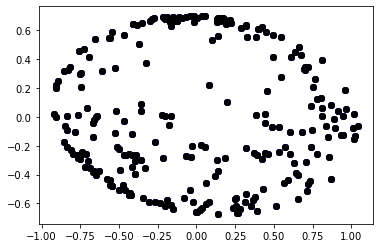

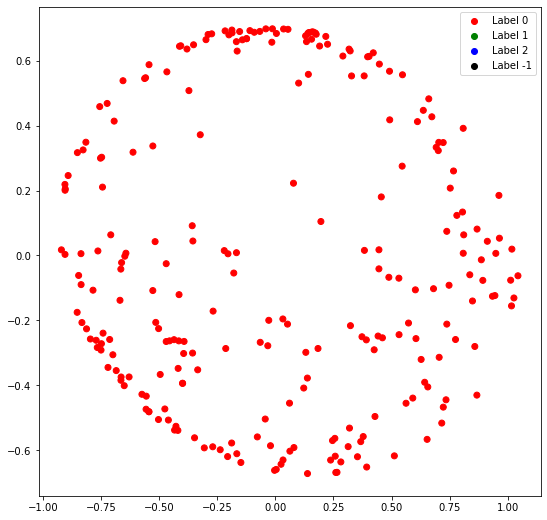

In [11]:
colors = {} 
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[-1] = 'k'
  
  
cvec = [colors[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(points_pca['p1'], points_pca['p2'], color ='r'); 
g = plt.scatter(points_pca['p1'], points_pca['p2'], color ='g'); 
b = plt.scatter(points_pca['p1'], points_pca['p2'], color ='b'); 
k = plt.scatter(points_pca['p1'], points_pca['p2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
plt.figure(figsize =(9, 9)) 
plt.scatter(points_pca['p1'], points_pca['p2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

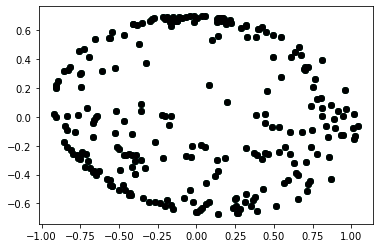

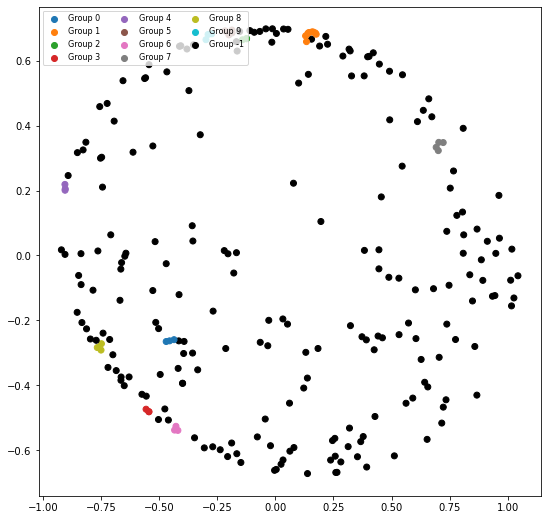

In [12]:
cluster = DBSCAN(eps=0.0206125, min_samples=3).fit(points_pca)
labels_new = cluster.labels_ 

colors = ['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k' ] 

colors1 = {} 
indices = [0,1,2,3,4,5,6,7,8,9,-1]
for i in indices:
    colors1[i] = colors[i]
  
cvec = [colors1[label] for label in labels_new] 
scatter_colors = [(plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[x])) for x in indices]  
scatter_groups = ['Group ' + str(x) for x in indices]
'''r = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[0]) 
g = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[1]) 
b = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[2]) 
c = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[3]) 
y = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[4]) 
m = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[5]) 
k = plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[-1]) '''
  
plt.figure(figsize =(9, 9)) 
plt.scatter(points_pca['p1'], points_pca['p2'], c = cvec)
plt.legend(
            scatter_colors,
            scatter_groups,
            scatterpoints = 1, 
            loc ='upper left', 
            ncol = 3, 
            fontsize = 8) 
'''plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), '''
plt.show() 

In [13]:
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True
labels = pd.DataFrame(cluster.labels_,columns=['Cluster ID'])
clean_points['Cluster ID'] = labels
clean_points

,level_0,index,filename,medianame,datetime,lat,lon,seconds,Cluster ID
0,0,457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114,22420.0,-1
1,1,718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098,24833.0,-1
2,2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0,0
3,3,767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103,24091.0,-1
4,4,817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132,17717.0,-1
...,...,...,...,...,...,...,...,...,...
246,358,66564,meta-sT75WFu2QPLW.json,sT75WFu2QPLW.mov,2021-01-06 18:02:10,38.8905,-77.0117,18130.0,-1
247,360,66796,meta-GDnybzI29aCx.json,GDnybzI29aCx.mov,2021-01-06 19:09:50,38.8905,-77.0109,22190.0,-1
248,362,67037,meta-MOPeiWMzp6mh.json,MOPeiWMzp6mh.mov,2021-01-06 19:25:36,38.8903,-77.0113,23136.0,-1
249,363,67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122,23882.0,-1


In [14]:
clusters = clean_points.dropna()
clusters = clusters[clusters['Cluster ID'] >= 0]
clusters.sort_values(by=['Cluster ID'])


,level_0,index,filename,medianame,datetime,lat,lon,seconds,Cluster ID
2,2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0,0
11,11,1472,meta-XZeZIBxC6R64.json,XZeZIBxC6R64.mov,2021-01-06 19:35:55,38.8898,-77.0086,23755.0,0
203,283,54230,meta-4wIDySD7tKxo.json,4wIDySD7tKxo.mov,2021-01-06 19:30:48,38.8899,-77.0089,23448.0,0
244,354,65984,meta-Km2S7d92uPH8.json,Km2S7d92uPH8.mov,2021-01-06 18:36:54,38.8902,-77.0108,20214.0,1
178,240,44939,meta-J6NjsQ3OmDEK.json,J6NjsQ3OmDEK.mov,2021-01-06 18:34:48,38.8902,-77.0109,20088.0,1
109,132,24069,meta-fqMErkRVItV0.json,fqMErkRVItV0.mov,2021-01-06 18:07:25,38.8902,-77.0106,18445.0,1
169,222,41470,meta-dNQEWzlDBIPp.json,dNQEWzlDBIPp.mov,2021-01-06 18:07:49,38.8902,-77.0105,18469.0,1
73,83,14367,meta-CmTRG8bUhFov.json,CmTRG8bUhFov.mp4,2021-01-06 18:45:17,38.8902,-77.0103,20717.0,1
167,219,40701,meta-EvuXaSzgYJ14.json,EvuXaSzgYJ14.mov,2021-01-06 18:34:38,38.8902,-77.0107,20078.0,1
18,19,2484,meta-aRWTR7sk7i90.json,aRWTR7sk7i90.mov,2021-01-06 17:59:41,38.8902,-77.0103,17981.0,1


In [95]:
boxes = []

for i in range(10):
    clust = clusters[clusters['Cluster ID'] == i]
    start = clust['datetime'].min()
    end = clust['datetime'].max()
    time_dist = ((end - start).total_seconds() / 60)
    y_range = (clust['lon'].max() + 0.00005, clust['lon'].min() - 0.00005)
    x_range = (clust['lat'].max() + 0.00005, clust['lat'].min() - 0.00005)
    area_x = (x_range[0] - x_range[1]) * 3600 * 90
    area_y = (x_range[0] - x_range[1]) * 3600 * 90
    print(f'Cluster {i} count: {len(clust)} | duration: {(time_dist):.2f} min | area: {area_x:.2f}ft x {area_y:.2f}ft')
    boxes.append({'cluster': i, 'start': start, 'end': end, 'time_dist': time_dist, 'x_range': x_range, 'y_range': y_range})


Cluster 0 count: 3 | duration: 5.53 min | area: 64.80ft x 64.80ft
Cluster 1 count: 8 | duration: 45.60 min | area: 32.40ft x 32.40ft
Cluster 2 count: 3 | duration: 1.65 min | area: 32.40ft x 32.40ft
Cluster 3 count: 3 | duration: 1.32 min | area: 32.40ft x 32.40ft
Cluster 4 count: 3 | duration: 1.57 min | area: 162.00ft x 162.00ft
Cluster 5 count: 4 | duration: 58.00 min | area: 129.60ft x 129.60ft
Cluster 6 count: 3 | duration: 1.75 min | area: 32.40ft x 32.40ft
Cluster 7 count: 4 | duration: 39.88 min | area: 259.20ft x 259.20ft
Cluster 8 count: 3 | duration: 10.68 min | area: 97.20ft x 97.20ft
Cluster 9 count: 3 | duration: 18.50 min | area: 64.80ft x 64.80ft


In [94]:
kml = skml.Kml()
kml.document.name = 'clusters_dbscan'
poly_colors = [sk.Color.blue,sk.Color.orange, sk.Color.green, sk.Color.red, sk.Color.purple, sk.Color.brown, sk.Color.pink, sk.Color.gray, sk.Color.olive, sk.Color.cyan]
for box in boxes:
    pol = kml.newpolygon(name = 'Cluster' + str(box['cluster']))
    a = [list(zip(x, box['x_range'])) for x in itertools.permutations(box['y_range'], len(box['x_range']))]
    a = a[0] + a[1]
    a.insert(0, a.pop())
    a.insert(2, a.pop())
    a.insert(0, a[-1])
    pol.outerboundaryis = a
    pol.polystyle.Color = str(poly_colors[box['cluster']]) + 'ff'
    pol.linestyle.width = 3
    pol.polystyle.fill = 0
    pol.polystyle.outline = 1


kml.save('clusters_dbscan.kml')
    
